In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import os
import matplotlib.ticker as mtick
from itertools import islice

## 1. Data Load

Units comment: both nominal GDP data values and monetary aggregates are given in millions of PLNs.

In [60]:
data_gdp = pd.read_csv(
    Path(os.getcwd()) / "data" / "macro_quarterly.csv", 
    sep=";", decimal=",", date_format="%d.%m.%Y", parse_dates=["yearquarter"], na_values=".")
data_gdp = data_gdp.loc[~data_gdp["GDP_nominal_mln_PLN_current_prices"].isna(), :].reset_index(drop=True)
data_gdp = data_gdp.set_index("yearquarter")
data_gdp = data_gdp[["GDP_nominal_mln_PLN_current_prices"]].rename(columns={"GDP_nominal_mln_PLN_current_prices": "GDP"})
data_gdp["GDP_RS"] = data["GDP"].rolling(4).sum()
data_gdp = data_gdp.loc[(~data_gdp.isna()).all(axis=1), :]

In [61]:
data_money = pd.read_csv(
    Path(os.getcwd()) / "data" / "nbp_money_supply.csv", 
    sep=";", decimal=",", date_format="%d.%m.%Y", parse_dates=["yearmon"], na_values=".").set_index("yearmon")
data_money = data_money.rename(columns=dict(zip(list(data_money.columns), [f"M{k}" for k in range(0, 4)])))

## 2. Calculation of Ratios - Yearly Rolling GDP Data

In [97]:
data = pd.merge(left=data_gdp, right=data_money, left_index=True, right_index=True, how="inner")
data = data[[f"M{k}" for k in range(0, 4)]].div(data["GDP_RS"], axis=0).rename(
    columns=dict(zip([f"M{k}" for k in range(4)], [f"M{k}_to_GDP" for k in range(4)])))
data = 100*data

## 3. Plotting

In [98]:
data

,M0_to_GDP,M1_to_GDP,M2_to_GDP,M3_to_GDP
2002-10-01,7.289040,16.061077,39.967366,39.987250
2003-01-01,7.157643,16.421480,39.131532,39.420357
2003-04-01,7.509452,16.392466,38.963126,39.363533
2003-07-01,8.153486,18.203021,39.312443,39.772373
2003-10-01,7.950119,18.445991,39.822046,40.294228
...,...,...,...,...
2022-07-01,14.294041,54.251023,68.071202,68.418940
2022-10-01,15.208629,51.206069,67.086412,67.522794
2023-01-01,13.974931,49.014344,65.448253,65.892614
2023-04-01,12.924992,47.334049,65.250401,65.632299


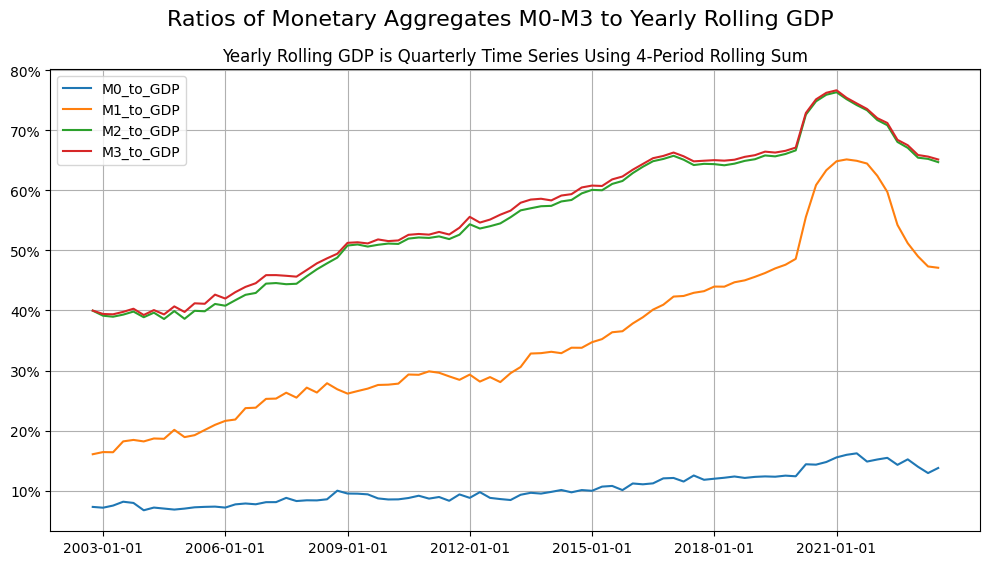

In [115]:
fig_ratios = plt.figure(figsize=(12, 6))
ax = fig_ratios.add_subplot(1, 1, 1)
ax.plot(data.index, data["M0_to_GDP"], label="M0_to_GDP")
ax.plot(data.index, data["M1_to_GDP"], label="M1_to_GDP")
ax.plot(data.index, data["M2_to_GDP"], label="M2_to_GDP")
ax.plot(data.index, data["M3_to_GDP"], label="M3_to_GDP")
ax.legend()
fig_ratios.suptitle("Ratios of Monetary Aggregates M0-M3 to Yearly Rolling GDP", size=16)
ax.set_title("Yearly Rolling GDP is Quarterly Time Series Using 4-Period Rolling Sum")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xticks(list(islice(data.index, 1, len(data.index), 12)))
ax.grid()

In [111]:
list(islice(data.index, 1, len(data.index), 8))

[Timestamp('2003-01-01 00:00:00'),
 Timestamp('2005-01-01 00:00:00'),
 Timestamp('2007-01-01 00:00:00'),
 Timestamp('2009-01-01 00:00:00'),
 Timestamp('2011-01-01 00:00:00'),
 Timestamp('2013-01-01 00:00:00'),
 Timestamp('2015-01-01 00:00:00'),
 Timestamp('2017-01-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2023-01-01 00:00:00')]